<a href="https://colab.research.google.com/github/apriarami789/image_clasification/blob/main/Image_Clasification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Klasifikasi Gambar
Nama : Mhd. Apri Arami

In [1]:
# import library yang nanti banyak digunakan pada pengolahan data proyek akhir ini

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selanjutnya kita menginstall library ```split-folders``` yang berguna untuk memisahkan gambar menjadi data gambar train, validation dan test.



In [2]:
!pip install split-folders

selanjutnya kita akan membagi data gambar dengan 3 kelas (rock, paper, and scissors) ke 3 folder train, validation and test

In [8]:
# melihat folder gambar berdasarkan kelas (rock, scissors, paper)
import os
import splitfolders

path_top = "drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning"        # nama path folder
print(os.listdir(path_top))                                             # list folder

['rock', 'scissors', 'paper']


In [7]:
for i in os.listdir(path_top):
  path_new = os.path.join(path_top,i)                                   # path untuk mengarahkan ke folder kelas
  number = os.listdir(path_new)                                         # menjumlahkan isi folder dari setiap kelas
  print(r"{0} jumlah file data {1}{2:>5} file".format(i,'\t',len(number)))

rock jumlah file data 	  738 file
scissors jumlah file data 	  767 file
paper jumlah file data 	  755 file


tertera diatas jumlah gambar di setiap kelas

selanjutnya kita membagi dataset gambar menjadi :
*   50 % untuk data train
*   40 % untuk data validation
*   10 % untuk data test

In [9]:
# membuat folder "rockpaperscissors_split" yang nanti berisi folder train, val, dan test
# yang di setiap folder berisi file gambar setiap kelas
path_split = os.path.join(path_top,"rockpaperscissors_split")

In [10]:
# jika sudah ada folder "rockpaperscissors_split" di path new maka sel ini dilewatkan
splitfolders.ratio(path_top,seed=22, output=path_split, ratio=(0.5, 0.4, 0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  8.61 files/s]
Copying files: 9 files [00:00, 16.56 files/s]
Copying files: 11 files [00:03,  2.73 files/s]
Copying files: 20 files [00:03,  6.73 files/s]
Copying files: 30 files [00:03, 12.44 files/s]
Copying files: 41 files [00:03, 20.22 files/s]
Copying files: 52 files [00:03, 29.25 files/s]
Copying files: 62 files [00:03, 38.26 files/s]
Copying files: 73 files [00:03, 48.84 files/s]
Copying files: 84 files [00:03, 58.75 files/s]
Copying files: 97 files [00:04, 69.88 files/s]
Copying files: 109 files [00:04, 76.84 files/s]
Copying files: 121 files [00:04, 83.37 files/s]
Copying files: 133 files [00:04, 87.14 files/s]
Copying files: 146 files [00:04, 90.82 files/s]
Copying files: 158 files [00:04, 92.94 files/s]
Copying files: 169 files [00:04, 94.38 files/s]
Copying files: 181 files [00:04, 96.37 files/s]
Copying files: 194 files [00:04, 98.46 files/s]
Copying files: 205 files [00:05, 98.78 files/s]
Copying fi

kita check jumlah file di setiap folder

In [11]:
# fungsi melihat directory dan jumlah file yang ada di dalamnya
def number_file_dir(path_outer):                                      # path_outer adalah directory yang didalamnya berisi folder train, val, dan test
  for filename in os.listdir(path_outer):                             # filename merupakan list folder train, val, dan test
    print(filename,"dataset")
    path_class = os.path.join(path_outer,filename)                    # path_class adalah directory train, val, dan test yang berisi folder rock, scissors, dan paper
    number_all,number_in = 0,0

    if len(os.listdir(path_class)) != 0 :                             # Jika folder rock, scissors, dan paper kosong maka script selanjutnya tidak bisa diexekusi
      for classs in os.listdir(path_class):                           # classs merupakan list folder rock, scissors, dan paper
        path_in = os.path.join(path_class,classs)                     # path_in adalah directory rock, scissors, dan paper yang berisi file gambar .png dari setiap label
        number_in = len(os.listdir(path_in))                          # jumlah file gambar pada setiap folder rock, scissors, dan paper
        print(r"folder {0} berjumlah = {1}{2:>8} file ".format(classs,'\t',number_in))

        number_all = number_all + number_in                           # mentotalkan jumlah file gambar pada semua folder rock, scissors, dan paper di setiap folder train, val, dan test

    print(r"folder {0} total berjumlah = {1}{2:>8} file".format(filename,'\t',number_all))
    print("\n")

In [12]:
# jumlah foto pada path_split
number_file_dir(path_split)

train dataset
folder rock berjumlah = 	     369 file 
folder scissors berjumlah = 	     383 file 
folder paper berjumlah = 	     377 file 
folder train total berjumlah = 	    1129 file


val dataset
folder rock berjumlah = 	     295 file 
folder scissors berjumlah = 	     306 file 
folder paper berjumlah = 	     302 file 
folder val total berjumlah = 	     903 file


test dataset
folder rock berjumlah = 	      74 file 
folder scissors berjumlah = 	      78 file 
folder paper berjumlah = 	      76 file 
folder test total berjumlah = 	     228 file




setelah kita mengetahui jumlah file di setiap folder train, val, dan test data selanjutnya menginspeksi file gambar. Untuk ini kita perlu mengimport library ```opencv``` yang berguna untuk praprocessing data gambar



In [13]:
import glob

path_list = []
for dataset in os.listdir(path_split):
  path_dataset = os.path.join(path_split,dataset)
  for classs in os.listdir(path_dataset):
    if classs != "rockpaperscissors_split" :                    # folder "rockpapaerscissors_split pada folder train, val atau test tidak dihitung karena itu folder kosong"
      path_class = os.path.join(path_dataset,classs)
      path_list.append(path_class)

```path_list``` ini berguna untuk memanggil dataset setiap kelas pada directory train, val atau test pada saat pemrosesan data



In [14]:
path_list

['drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/paper',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/paper',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/paper']

selanjutnya menampilkan beberapa contoh gambar pada setiap label/kelas

In [59]:
import cv2

# menampilkan gambar asli dan pecahan gambar pada setiap channel (RGB)
def image_show(pathlist,n_image=0,header=None,figsize=(10,10)):
  """

  Args:
    pathlist: list contain path per labels
    n_image: image ke- pada list
    header: header utama gambar
    figsize: size gambar keseluruhan
  """
  channels = ['rgb_','b_','g_','r_']
  label = []
  img1, img1_b, img1_g, img1_r  = [], [], [], []                                # list channels gambar

  for i in range(3):
    image_file = glob.glob(os.path.join(pathlist[i],'*'))
    image = cv2.cvtColor(cv2.imread(image_file[n_image]), cv2.COLOR_BGR2RGB)    # convert color dari BGR (default) ke RGB
    img1.append(image)
    labels = os.path.split(pathlist[i])[-1]
    label.append(labels)

    r_channel, g_channel, b_channel = cv2.split(image)                          # gambar di pisah berdasarkan channelnya
    img1_r.append(r_channel)
    img1_g.append(g_channel)
    img1_b.append(b_channel)


  fig, axes = plt.subplots(nrows=4, ncols=3, figsize=figsize)
  list_img = [img1,img1_b,img1_g,img1_r]

  # plot contoh gambar
  for i in range(4):
    imgg = list_img[i]
    for j in range(3):
      axes[i,j].imshow(imgg[j])
      axes[i,j].set_title(channels[i] + label[j])
      axes[i,j].axis('off')
  fig.suptitle(header)

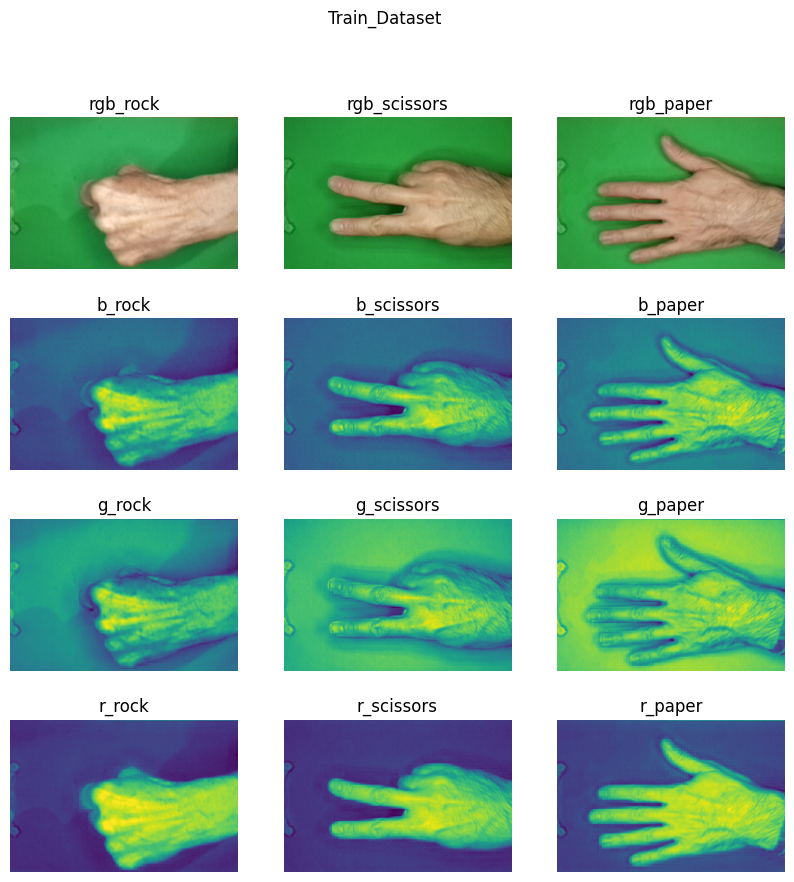

In [16]:
image_show(pathlist=path_list,n_image=100,header='Train_Dataset',figsize=(10,10))

In [17]:
# dimensi file gambar
image_file = glob.glob(os.path.join(path_list[0],'*'))
image = cv2.imread(image_file[0])
image.shape

(200, 300, 3)

dimensi gambar y = 200 pixel, x = 300 pixel, dan 3 channel gambar (RGB)

In [18]:
# mengecek apakah dimensi gambar setiap image sama semua (200, 300, 3)
for i in range(3):
  image_file = glob.glob(os.path.join(path_list[i],'*'))
  for idx, img in enumerate(image_file) :
    image = cv2.imread(img)
    dims_img = image.shape == (200,300,3)
    if dims_img is False :
      image_name = os.path.split(image_file)[-1]
      print(r"directory {0} dengan nama file {1} diurutan {2}",format(path_list[i],image_name,idx))


setelah di cek rupanya dimensi gambar setiap file pada folder train sama semua. sehingga file tidak ada yang dibuang

## Image Augmentation

selanjutnya kita melakukan image augmentation. Pada tahap ini saya akan mengacak semua gambar dan memberikan metode image augmentation berbeda.

In [19]:
!pip install imgaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.7 MB/s eta 0:00:00


In [20]:
# membuat random generaor untuk memilih gambar yang akan di edit
import random
import shutil
from pathlib import Path
import imgaug as ia
import imgaug.augmenters as iaa

def img_augmentation(pathlist):
  """

  Args:
    pathlist: list contain path per labels

  Returns: [image matrix, labels]

  """
  img_ori, img_edit = [], []
  folder = glob.glob(os.path.join(pathlist,'*'))

  for img in folder:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                              # convert color dari BGR (default) ke RGB
    image = cv2.resize(image, (200,200), interpolation=cv2.INTER_NEAREST)       # resize gambar dari (200,300) menjadi (200,200) dengan menginterpolasi nilai pixel terdekat
    img_ori.append(image)

  # Augmentation sequence
  seq = iaa.Sequential([
      iaa.Fliplr(0.5),  # horizontal flip with 50% probability
      iaa.Flipud(0.5),  # vertical flip with 50% probability
      iaa.Crop(percent=(0, 0.2)),  # random crops up to 20% of the image
      iaa.Sometimes(0.3, iaa.GaussianBlur(sigma=(0, 1.0))),  # apply Gaussian blur with 30% probability
      iaa.ContrastNormalization((0.5, 2.0)),  # strengthen or minimize contrast
      iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # additive Gaussian noise
      iaa.Multiply((0.8, 1.2),per_channel=0.5),  # change brightness
      iaa.Affine(translate_px={"x": (-50, 50), "y": (-50, 50)}),  # affine transformations (translation)
      iaa.AddToHueAndSaturation((-20, 20)),  # add or subtract hue and saturation
      iaa.Sharpen(alpha=(0, 1.0)),  # add or subtract sharpness
      iaa.CropAndPad(percent=(-0.25, 0.25)),  # change image size
      iaa.Add((-40, 40), per_channel=0.5)  # add random color values
  ], random_order=True)

  # mengaugmentasi gambar
  images_aug = seq(images=img_ori)

  # penambahan label pada gambar
  label = os.path.split(pathlist)[-1]
  for i in img_ori:
    img_edit.append([i,label])

  # menampilkan 20 gambar teratas pada list yang sudah di augmentasi
  fig = plt.figure(figsize=(10,10))
  imgaes_aug_show = images_aug[:20]
  path = Path(pathlist)
  plt.suptitle('\\'.join(path.parts[5:]))
  for i, image in enumerate(imgaes_aug_show):
      plt.subplot(int(len(imgaes_aug_show) / 5) + 1, 5, i + 1)
      plt.axis('off')
      plt.imshow(image)

  # mengosongkan folder sebelumnya
  if os.path.exists(pathlist):
    shutil.rmtree(pathlist)
  os.makedirs(pathlist)

  # mengisi folder dengan file gambar yang sudah di augmentasi
  for idx, fold in enumerate(folder):
    plt.imsave(fold, images_aug[idx])

  return img_edit

/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


jumlah file gambar train\rock adalah 369 
jumlah file gambar train\scissors adalah 383 
jumlah file gambar train\paper adalah 377 


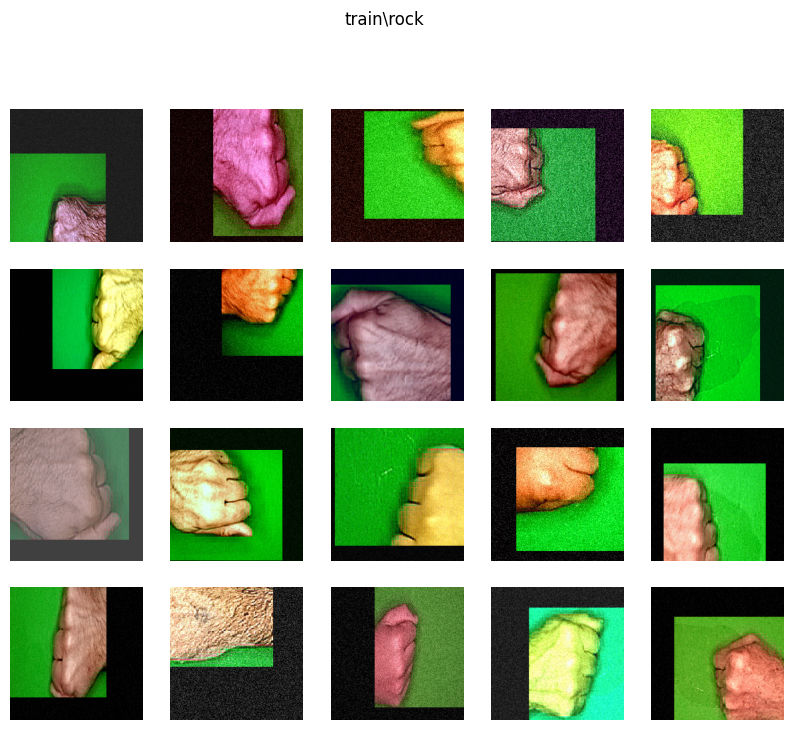

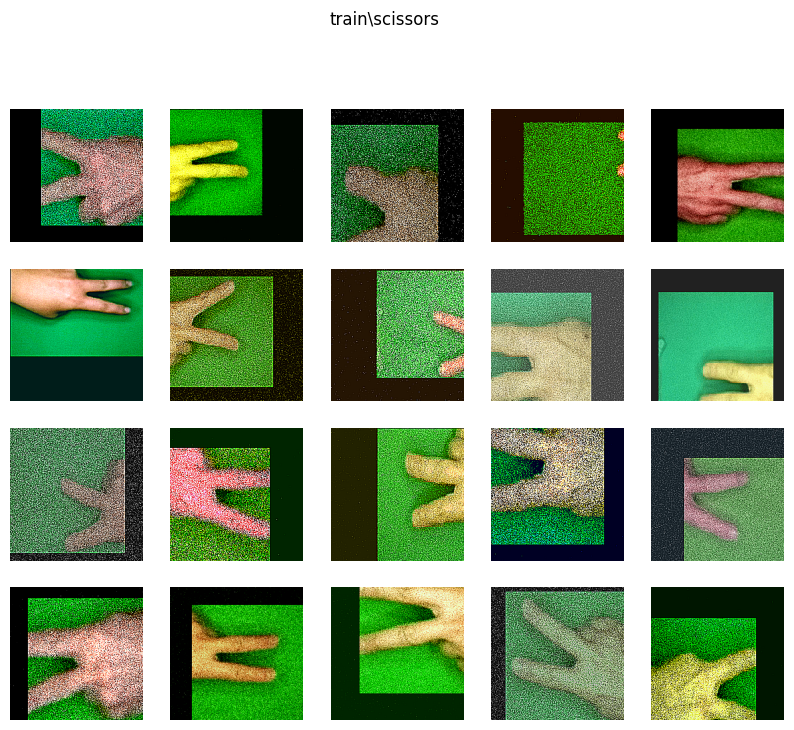

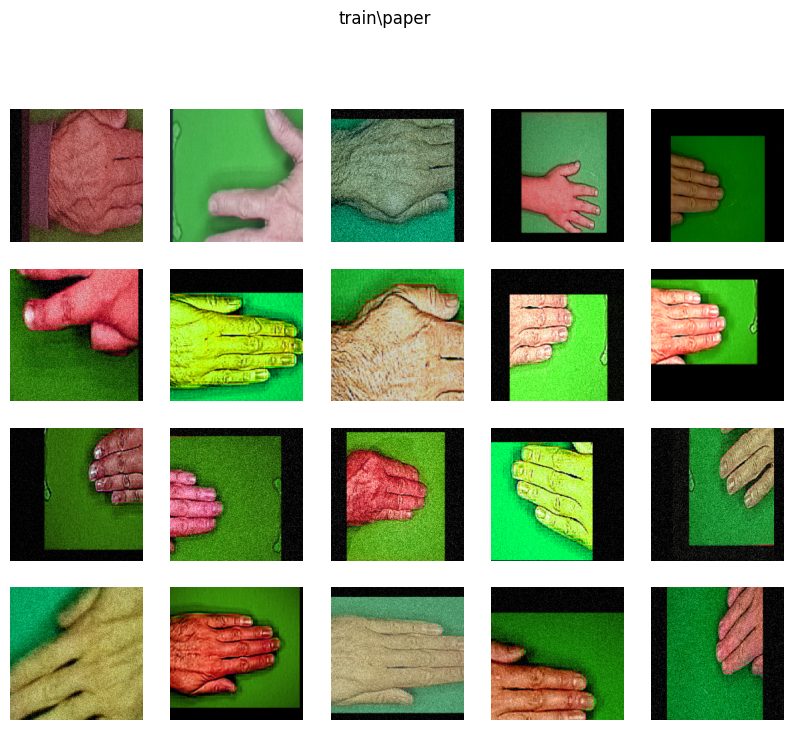

In [21]:
# image augmentation pada data latih
x_train, y_train = [], []                               # x adalah list gambar dan y adalah list label gambar
for i in range(3):
  img_aug = img_augmentation(path_list[i])
  for features, labels in img_aug:
    x_train.append(features)
    y_train.append(labels)

  path = Path(path_list[i])
  frt = '\\'.join(path.parts[5:])
  print(r"jumlah file gambar {0} adalah {1} ".format(frt,len(img_aug)))

<Axes: xlabel='count'>

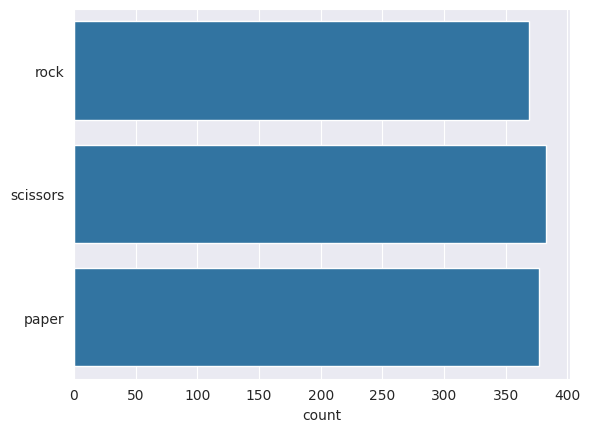

In [22]:
# jumlah data train
sns.set_style('darkgrid')
sns.countplot(y_train)

/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


jumlah file gambar val\rock adalah 295 
jumlah file gambar val\scissors adalah 306 
jumlah file gambar val\paper adalah 302 


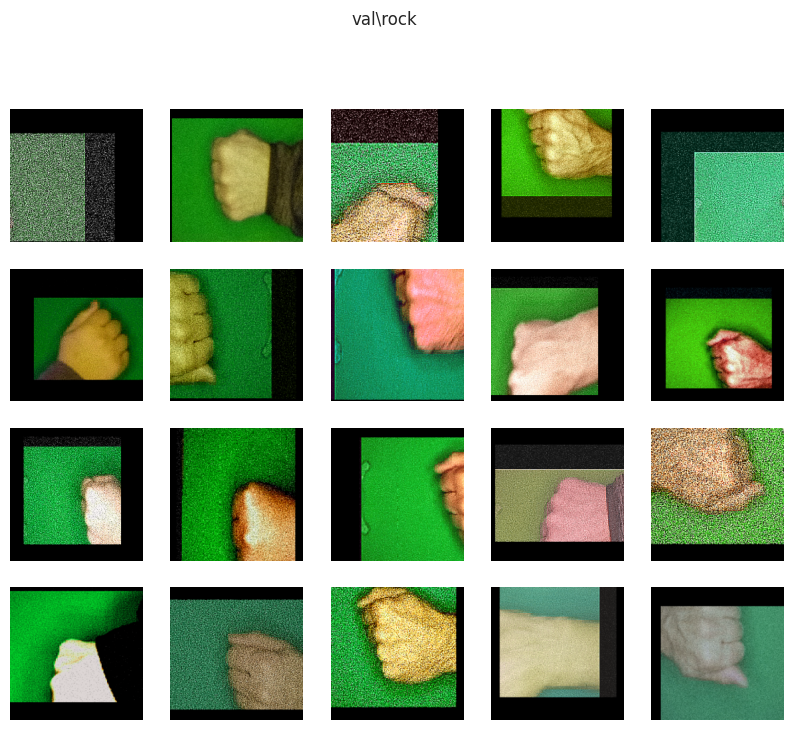

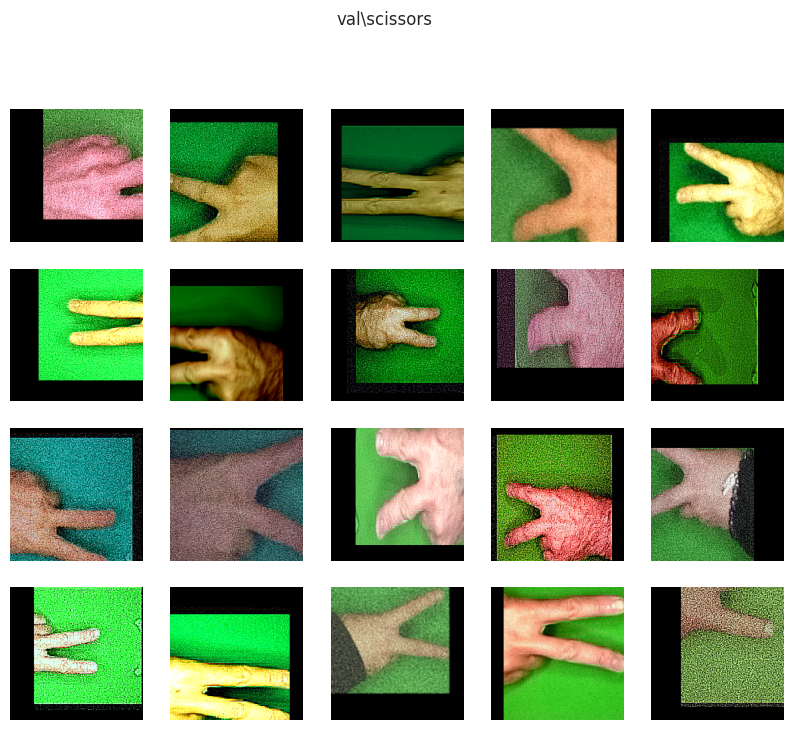

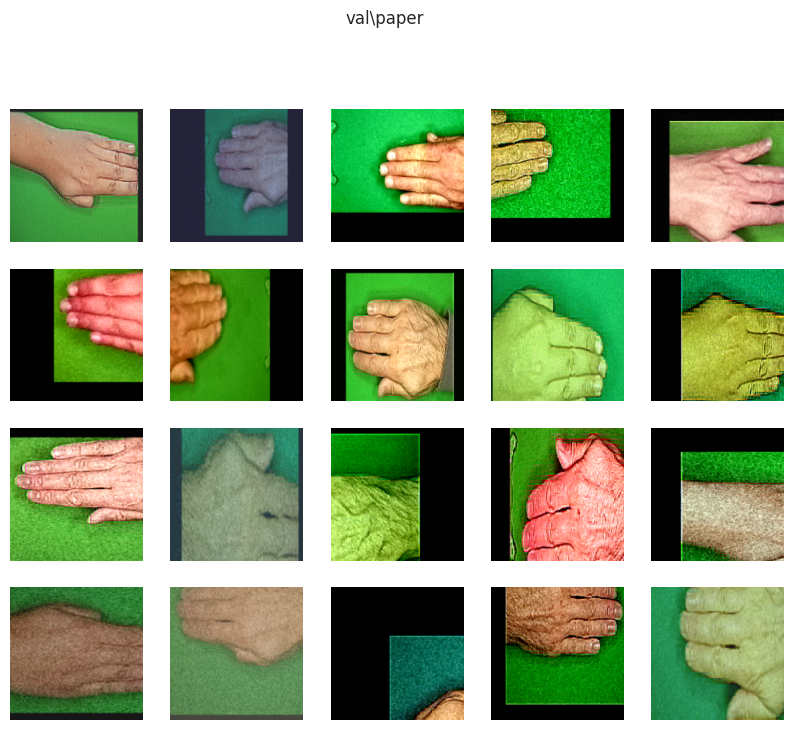

In [23]:
# image augmentation pada data validasi
x_val, y_val = [], []
for i in range(3,6):
  img_aug = img_augmentation(path_list[i])
  for features, labels in img_aug:
    x_val.append(features)
    y_val.append(labels)

  path = Path(path_list[i])
  frt = '\\'.join(path.parts[5:])
  print(r"jumlah file gambar {0} adalah {1} ".format(frt,len(img_aug)))

<Axes: xlabel='count'>

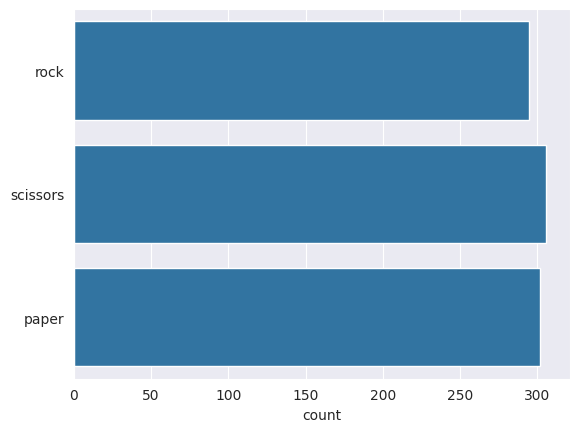

In [24]:
# jumlah data val
sns.set_style('darkgrid')
sns.countplot(y_val)

/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


jumlah file gambar test\rock adalah 74 
jumlah file gambar test\scissors adalah 78 
jumlah file gambar test\paper adalah 76 


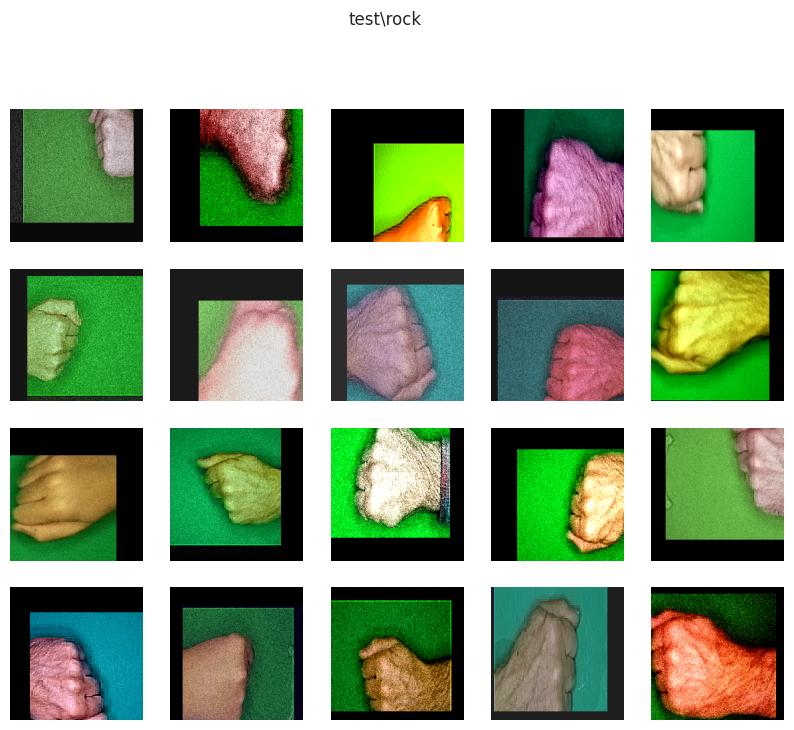

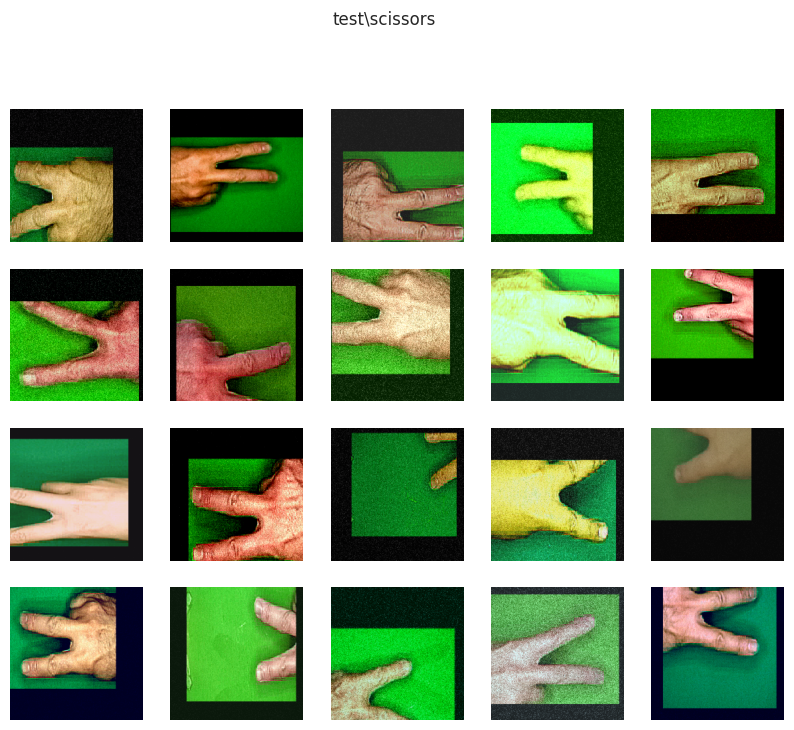

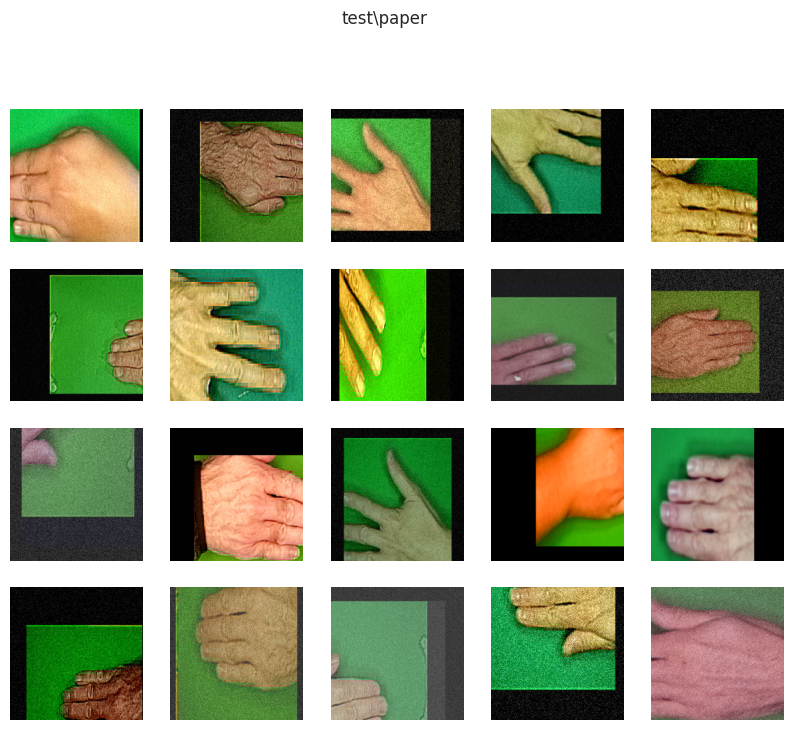

In [25]:
# image augmentation pada data test
x_test, y_test = [], []
for i in range(6,9):
  img_aug = img_augmentation(path_list[i])
  for features, labels in img_aug:
    x_test.append(features)
    y_test.append(labels)

  path = Path(path_list[i])
  frt = '\\'.join(path.parts[5:])
  print(r"jumlah file gambar {0} adalah {1} ".format(frt,len(img_aug)))

<Axes: xlabel='count'>

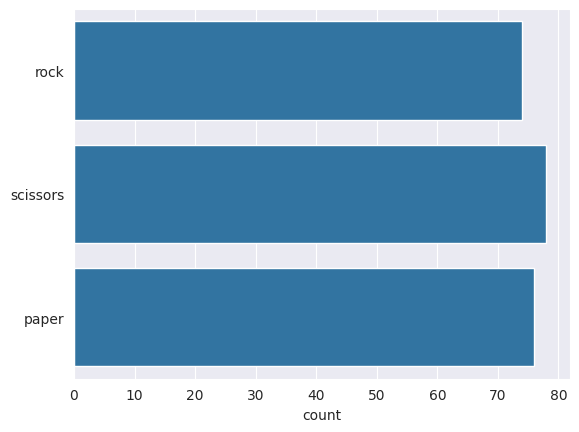

In [26]:
# jumlah data test
sns.set_style('darkgrid')
sns.countplot(y_test)

In [27]:
y_data = [y_train,y_val,y_test]

for cat in y_data:
  for i in range(len(cat)):
    if cat[i] == 'rock':
      cat[i] = 0
    elif cat[i] == 'scissors' :
      cat[i] = 1
    elif cat[i] == 'paper':
      cat[i] = 2

## Model

In [61]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [29]:
labels_code = {0:'rock',1:'scissors',2:'paper'}
x_data =  [x_train,x_val,x_test]
y_data = [y_train,y_val,y_test]

seed = 100

for i in range(len(x_data)):
  x_data[i] = random.Random(seed).shuffle(x_data[i])
  y_data[i] = random.Random(seed).shuffle(y_data[i])

In [30]:
x_train_1 = np.array(x_train)
y_train_1 = np.array(y_train)
x_val_1 = np.array(x_val)
y_val_1 = np.array(y_val)

In [31]:
# Normalize the data
x_train_1 = x_train_1 / 255
x_val_1 = x_val_1 / 255

In [32]:
x_train_1.shape

(1129, 200, 200, 3)

In [33]:
model = Sequential()
model.add(Conv2D(16,3,padding="same", activation="relu", input_shape=(200,200,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64,3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

In [34]:
opt = Adam()
model.compile(optimizer = opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [35]:
history = model.fit(x_train_1, y_train_1, epochs=10, validation_data = (x_val_1, y_val_1))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 9s 217ms/step - loss: 1.1383 - accuracy: 0.4455 - val_loss: 0.8558 - val_accuracy: 0.7209
Epoch 2/10
36/36 [==============================] - 7s 183ms/step - loss: 0.5518 - accuracy: 0.8034 - val_loss: 0.4539 - val_accuracy: 0.8405
Epoch 3/10
36/36 [==============================] - 6s 180ms/step - loss: 0.3331 - accuracy: 0.8831 - val_loss: 0.2410 - val_accuracy: 0.9181
Epoch 4/10
36/36 [==============================] - 6s 177ms/step - loss: 0.1576 - accuracy: 0.9451 - val_loss: 0.1836 - val_accuracy: 0.9402
Epoch 5/10
36/36 [==============================] - 6s 175ms/step - loss: 0.0948 - accuracy: 0.9708 - val_loss: 0.2378 - val_accuracy: 0.9214
Epoch 6/10
36/36 [==============================] - 6s 171ms/step - loss: 0.0672 - accuracy: 0.9787 - val_loss: 0.1561 - val_accuracy: 0.9513
Epoch 7/10
36/36 [==============================] - 6s 170ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.1920 - val_accuracy: 0.9424
Epoch 8/10
36/36 

dari pelatihan model diatas didapatkan bahwa:
1. akurasi data latih yang paling tinggi dihasilkan sebesar 99.82 %
2. akurasi data validasi yang paling tinggi dihasilkan sebesar 96.35 %

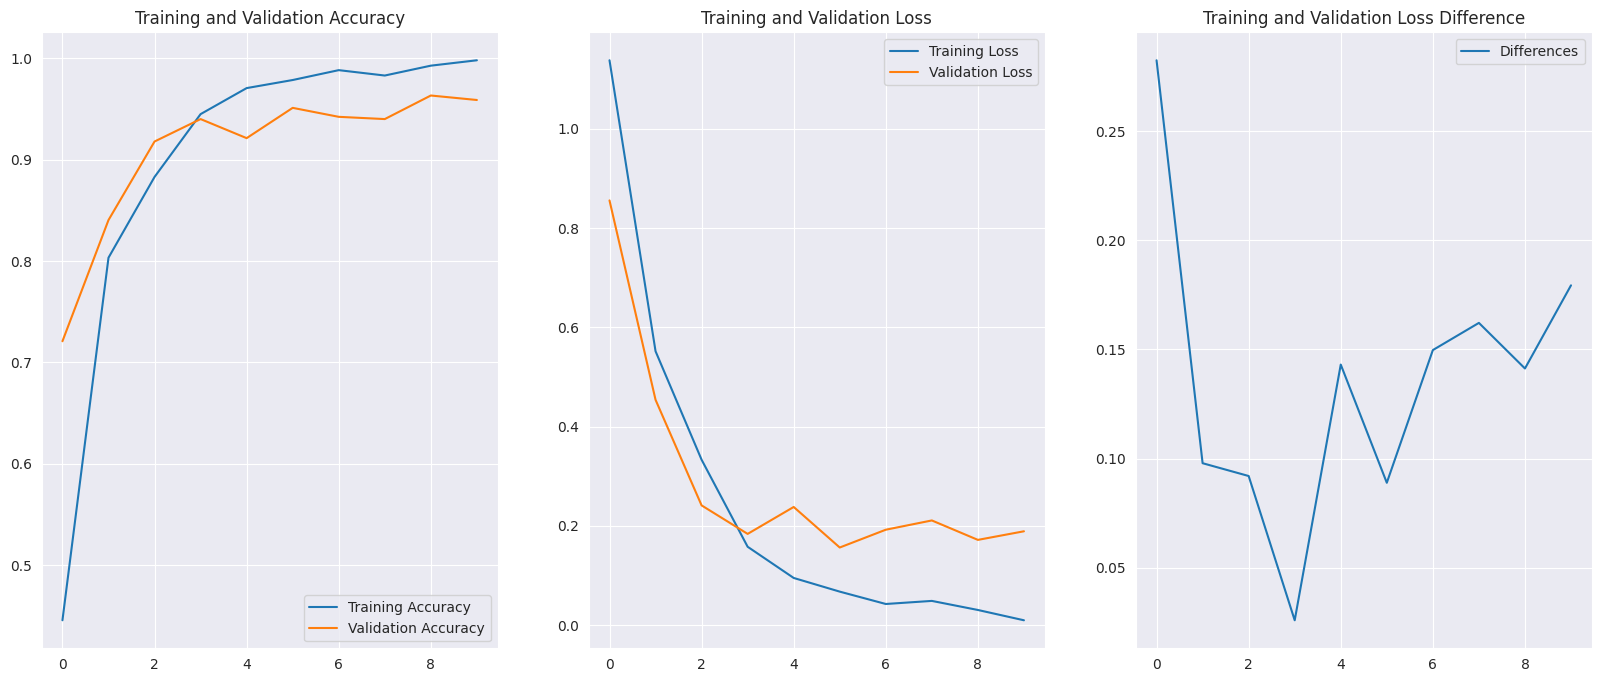

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, np.abs((np.array(loss) - np.array(val_loss))), label='Differences')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

8/8 [==============================] - 0s 37ms/step
              precision    recall  f1-score   support

        rock       0.97      0.95      0.96        74
    scissors       0.93      1.00      0.96        78
       paper       0.94      0.89      0.92        76

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



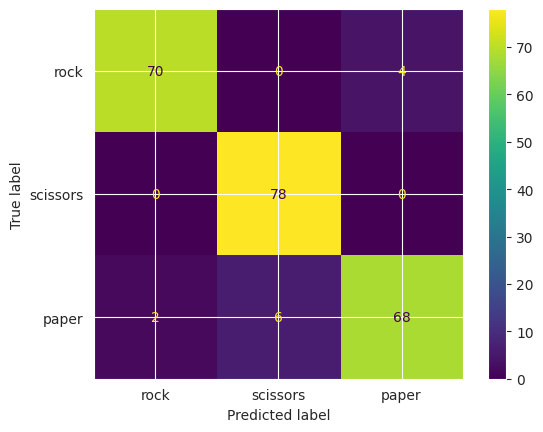

In [62]:
x_test_1 = np.array(x_test)
y_test_1 = np.array(y_test)
y_prob = model.predict(x_test_1)
y_pred = y_prob.argmax(axis=-1)
print(classification_report(y_test_1, y_pred, labels=[0, 1, 2], target_names=['rock','scissors','paper']))

confusion_matrix = confusion_matrix(y_test_1, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['rock','scissors','paper'])

cm_display.plot()
plt.show()

In [76]:
y_prob[0].max()

0.99999994

hasil prediksi model dengan menggunakan data uji menunjukan akurasi 95%

In [90]:
# memprediksi gambar yang diupload ke google colab
def image_prediction(file_img):
  # membaca gambar
  image = cv2.imread(file_img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (200,200), interpolation=cv2.INTER_NEAREST)
  plt.imshow(image)
  plt.title(file_img)

  x_test = image.reshape((1,) + image.shape)
  y_prob = model.predict(x_test)
  y_pred = y_prob.argmax(axis=-1)

  print(r'Hasil prediksi Gambar ini adalah {0} dengan probabilitas'.format(labels_code[y_pred[0]]))
  print('Rock \t\t=', y_prob[0][0])
  print('Scissors \t=', y_prob[0][1])
  print('Paper \t\t=', y_prob[0][2])

1/1 [==============================] - 0s 32ms/step
Hasil prediksi Gambar ini adalah paper dengan probabilitas
Rock 		= 0.0
Scissors 	= 0.0
Paper 		= 1.0


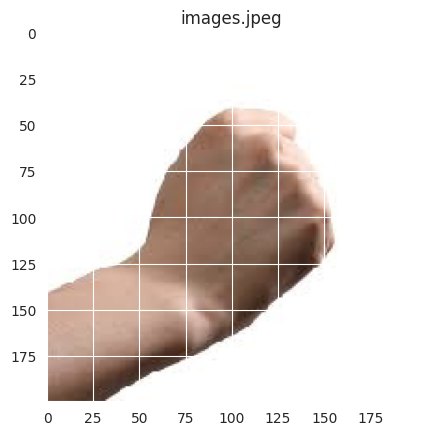

In [92]:
image_prediction('images.jpeg')